In [1]:
import numpy as np
import os
import sys
import warnings
import pandas as pd
import matplotlib.cm as cm
from scipy.interpolate import griddata
from scipy.spatial import KDTree
import scipy.interpolate as scintrp
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import savgol_filter as smooth

from multiprocessing import Pool

# import vtk
import vtkmodules.all as vtk
from vtk.util.numpy_support import vtk_to_numpy

import wind
import foam
import wio


In [2]:
# vtkDir = r'..\data\ttuMSfl0450.0\postProcessing\wallPressure'

vtkDir = r'I:\backup\graham\gra_20_12_13\fmGlbl\final\ttuE010_450.2\postProcessing\wallPressure'
vtkTimes = os.listdir(vtkDir)
vtkName = 'p_building.vtk'
file = r'D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CFD_simulations\2022_08_TTU_WL_LES\OF_inputFiles\45deg\WTtaps_45deg.csv'

tapCoords = pd.read_csv(file)
print(len(vtkTimes))

10673


In [5]:
first = True
for vtk_i in vtkTimes[1:5]:
    vtkFile = vtkDir+'/'+vtk_i+'/'+vtkName
    p = wio.extractTapDataFromVTK(vtkFile=vtkFile,tapCoords=tapCoords.to_numpy()[:,1:])
    print(np.shape(p))
    if first:
        p_tap = np.reshape(p,[-1,1])
        print(np.shape(p_tap))
        first = False
    else:
        p_tap = np.concatenate((p_tap, np.reshape(p,[-1,1])), axis=1)
        print(np.shape(p_tap))

print(np.shape(p_tap))

I:\backup\graham\gra_20_12_13\fmGlbl\final\ttuE010_450.2\postProcessing\wallPressure/0.0066/p_building.vtk
(456, 1)
(456, 1)
I:\backup\graham\gra_20_12_13\fmGlbl\final\ttuE010_450.2\postProcessing\wallPressure/0.0099/p_building.vtk
(456, 1)
(456, 2)
I:\backup\graham\gra_20_12_13\fmGlbl\final\ttuE010_450.2\postProcessing\wallPressure/0.0132/p_building.vtk
(456, 1)
(456, 3)
I:\backup\graham\gra_20_12_13\fmGlbl\final\ttuE010_450.2\postProcessing\wallPressure/0.0165/p_building.vtk
(456, 1)
(456, 4)
(456, 1)


In [ ]:
# first = True
# for vtk_i in vtkTimes[1:5]:
#    vtkFile = vtkDir+'/'+vtk_i+'/'+vtkName
#    print(vtkFile)
#    reader = vtk.vtkPolyDataReader()
#    reader.SetFileName(vtkFile)
#    reader.ReadAllFieldsOn()
#    reader.Update()
#    polydata = reader.GetOutput()
   
#    if first:
#       nCells = polydata.GetNumberOfCells()
#       cellCenters = np.empty([nCells,3])
#       cells = KDTree(cellCenters)
#       dd,ii = cells.query(tapCoords.to_numpy()[:,1:])
      

#    for i in range(nCells):
#       pts = polydata.GetCell(i).GetPoints()    
#       cell_i_vrtx = np.array([pts.GetPoint(i) for i in range(pts.GetNumberOfPoints())])
#       cellCenters[i,:] = np.mean(cell_i_vrtx,axis=0)

#    p = vtk_to_numpy(polydata.GetCellData().GetArray(0))

#    if first:
#       p_tap = np.reshape(p[ii],[-1,1])
#       first = False
#    else:
#       p_tap = np.concatenate((p_tap, np.reshape(p[ii],[-1,1])), axis=1)




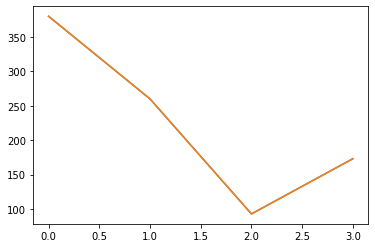

In [7]:
# time = np.array(vtkTimes[1:5],dtype=float)
# idx = np.argsort(time)

# print(np.shape(time))

# p_sorted = p_tap[:,idx]
# print(np.shape(p_sorted))

# caseDir = r'D:\tempData_depot\simData_CandC\ttuE010_450.2/'


# # file = caseDir+r'postProcessing/resampledToTNGwindTunnel.npy'
# # p_sorted = np.load(file)

plt.figure()
plt.plot(p_tap[150,:])
plt.plot(p_tap[11,:])

In [ ]:
mainProf = foam.processVelProfile(caseDir=caseDir,probeName='probes.V1',name='ttuE010_450.2',H=0.08)
pts,t,p0Prof = foam.readProbe(probeName='probes.V0',postProcDir=caseDir+'postProcessing/',field="p")

In [ ]:
print(np.shape(p0Prof))


In [ ]:
ttubldg = wind.building(H=0.08,tapCoord3D=tapCoords)
p0Idx = 27
cp = wind.Cp(name='tngE1_45deg_LES',
                    bldg=ttubldg,
                    refProfile=mainProf,
                    pOfT=p_sorted[:,500:],
                    p0ofT=p0Prof[500:-1,p0Idx])

In [ ]:
pDyn = 0.5*cp.airDensity*cp.refProfile.Uh**2
print(cp.refProfile.Uh)
print(pDyn)
CpOfT = p_sorted*0.0
for i in range(np.shape(p_sorted)[0]):
    CpOfT[i,:] = np.divide(np.subtract(p_sorted[i,:], p0Prof[:-1,p0Idx]),
                            pDyn)



plt.figure()
plt.plot(p_sorted[50,:])
plt.plot(p_sorted[55,:])

# print(cp.Uh)
# print(np.shape(cp.CpOfT))
# print(np.mean((cp.pOfT[50,:])))
# print(np.mean((cp.pOfT[150,:])))
# print(np.mean((cp.pOfT[250,:])))
# plt.plot(cp.CpOfT[150,:],'.k')
# plt.figure()
# plt.plot(cp.CpMean,'.k')

In [ ]:
# from pathlib import Path

# from vtkmodules.vtkIOGeometry import (
#     vtkBYUReader,
#     vtkOBJReader,
#     vtkSTLReader
# )
# from vtkmodules.vtkIOLegacy import vtkPolyDataReader
# from vtkmodules.vtkIOPLY import vtkPLYReader
# from vtkmodules.vtkIOXML import vtkXMLPolyDataReader


# def ReadPolyData(file_name):
#     valid_suffixes = ['.g', '.obj', '.stl', '.ply', '.vtk', '.vtp']
#     path = Path(file_name)
#     if path.suffix:
#         ext = path.suffix.lower()
#     if path.suffix not in valid_suffixes:
#         print(f'No reader for this file suffix: {ext}')
#         return None
#     else:
#         if ext == ".ply":
#             reader = vtkPLYReader()
#             reader.SetFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()
#         elif ext == ".vtp":
#             reader = vtkXMLPolyDataReader()
#             reader.SetFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()
#         elif ext == ".obj":
#             reader = vtkOBJReader()
#             reader.SetFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()
#         elif ext == ".stl":
#             reader = vtkSTLReader()
#             reader.SetFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()
#         elif ext == ".vtk":
#             reader = vtkPolyDataReader()
#             reader.SetFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()
#         elif ext == ".g":
#             reader = vtkBYUReader()
#             reader.SetGeometryFileName(file_name)
#             reader.Update()
#             poly_data = reader.GetOutput()

#         return poly_data


In [ ]:
# pdt = ReadPolyData(vtkFile)



In [ ]:
# import matplotlib.pyplot as plt

# import numpy as np
# import vtk
# from vtk.util.numpy_support import vtk_to_numpy

# # load a vtk file as input
# reader = vtk.vtkXMLUnstructuredGridReader()
# reader.SetFileName("my_input_data.vtk")
# reader.Update()

# # Get the coordinates of nodes in the mesh
# nodes_vtk_array= reader.GetOutput().GetPoints().GetData()

# #The "Temperature" field is the third scalar in my vtk file
# temperature_vtk_array = reader.GetOutput().GetPointData().GetArray(3)

# #Get the coordinates of the nodes and their temperatures
# nodes_nummpy_array = vtk_to_numpy(nodes_vtk_array)
# x,y,z= nodes_nummpy_array[:,0] , nodes_nummpy_array[:,1] , nodes_nummpy_array[:,2]

# temperature_numpy_array = vtk_to_numpy(temperature_vtk_array)
# T = temperature_numpy_array

# #Draw contours
# npts = 100
# xmin, xmax = min(x), max(x)
# ymin, ymax = min(y), max(y)

# # define grid
# xi = np.linspace(xmin, xmax, npts)
# yi = np.linspace(ymin, ymax, npts)
# # grid the data
# Ti = griddata((x, y), T, (xi[None,:], yi[:,None]), method='cubic')  

# ## CONTOUR: draws the boundaries of the isosurfaces
# CS = plt.contour(xi,yi,Ti,10,linewidths=3,cmap=cm.jet) 

# ## CONTOUR ANNOTATION: puts a value label
# plt.clabel(CS, inline=1,inline_spacing= 3, fontsize=12, colors='k', use_clabeltext=1)

# plt.colorbar() 
# plt.show() 

In [ ]:
# from tvtk.api import tvtk
# reader = tvtk.GenericDataObjectReader()
# reader.file_name = vtkFile
# # reader.read_all_scalars()
# reader.read_cells(1)
# reader.update()
# ug = reader.output



In [ ]:
# pts = ug.points.data.to_array()
# cells = ug.get_cell
# p = ug.cell_data.vectors
# # print(pts)
# print(np.shape(cells))

